In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('Eval/ratings.csv')
df.head()

,size,document,splitter,score,chunk,question,relevance_rating,groundness_rating,standalone_rating,limit,collection,context,ctx_length,answer,model,ratings
0,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"```python\n[1, 0, 2]\n```"
1,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,char,['domiciled outside India or any insurer as de...,5844,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"```python\n[""1"", ""0"", ""2""]\n```"
2,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,token,"['thereof shall, in all legal proceedings (whe...",27040,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"```python\n[""0"", ""1"", ""2""]\n```"
3,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,recursive,['(i) “policy” means a policy issued or renewe...,26431,"According to the context, individuals or entit...",meta-llama-3.1-8b-instruct,"```python\n[1, 2, 0]\n```"
4,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities violating provisions o...,meta-llama-3.1-8b-instruct,"```python\n[1, 0, 2]\n```"


In [59]:
def clean_ratings(ratings):
    try:
        left = ratings.index('[')
        right = ratings.index(']') + 1
        ratings = eval(ratings[left:right])
        ratings = [int(x) for x in ratings]
        return ratings
    except:
        return np.nan
    
def get_sum(ratings):
    return sum(ratings)

In [60]:
df['ratings'] = df['ratings'].apply(clean_ratings)
df = df[df['ratings'].apply(len) == df['limit']]
df['sum'] = df['ratings'].apply(get_sum)

In [61]:
df.head()

,size,document,splitter,score,chunk,question,relevance_rating,groundness_rating,standalone_rating,limit,collection,context,ctx_length,answer,model,ratings,sum
0,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"[1, 0, 2]",3
1,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,char,['domiciled outside India or any insurer as de...,5844,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"[1, 0, 2]",3
2,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,token,"['thereof shall, in all legal proceedings (whe...",27040,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"[0, 1, 2]",3
3,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,recursive,['(i) “policy” means a policy issued or renewe...,26431,"According to the context, individuals or entit...",meta-llama-3.1-8b-instruct,"[1, 2, 0]",3
4,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities violating provisions o...,meta-llama-3.1-8b-instruct,"[1, 0, 2]",3


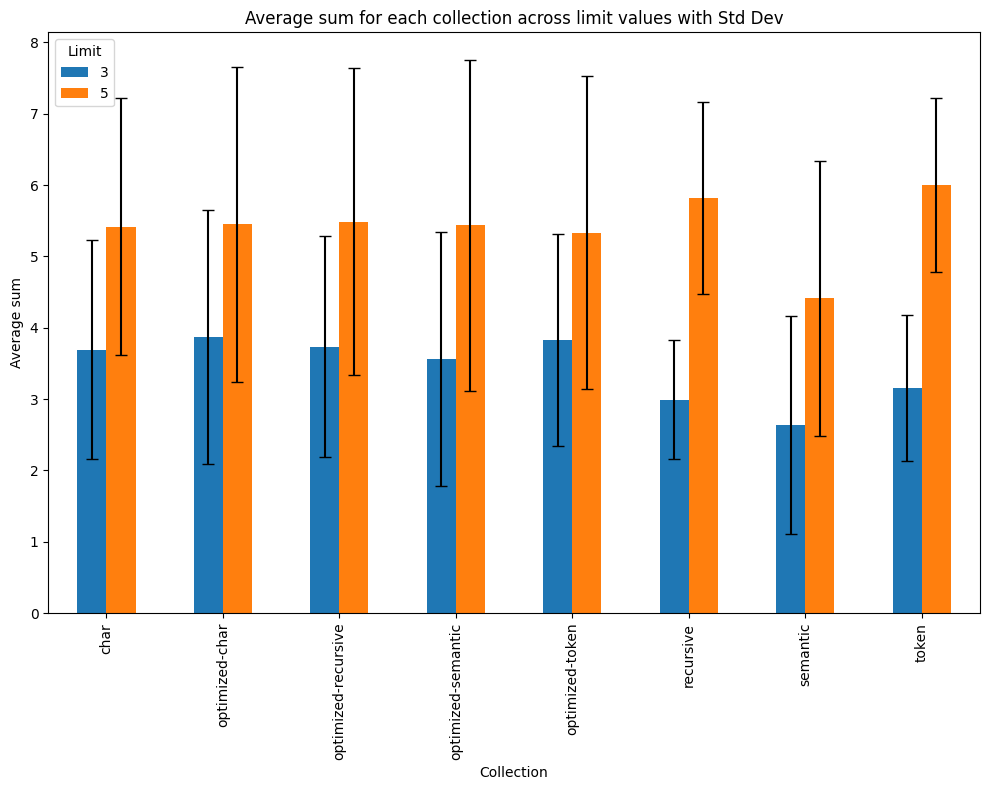

In [72]:
stats = df.groupby(['collection', 'limit'])['sum'].agg(['mean', 'std']).unstack()

# Plotting with error bars
fig, ax = plt.subplots(figsize=(10, 8))
stats['mean'].plot(kind='bar', yerr=stats['std'], capsize=4, ax=ax)
ax.set_title('Average sum for each collection across limit values with Std Dev')
ax.set_xlabel('Collection')
ax.set_ylabel('Average sum')
ax.legend(title='Limit')
plt.tight_layout()
plt.show()

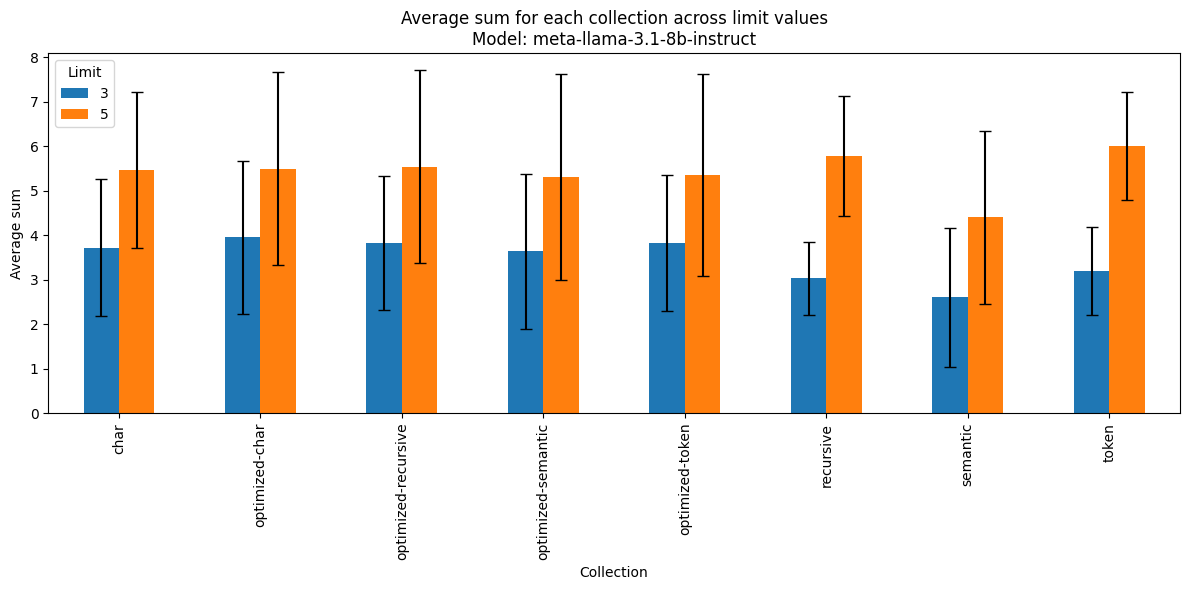

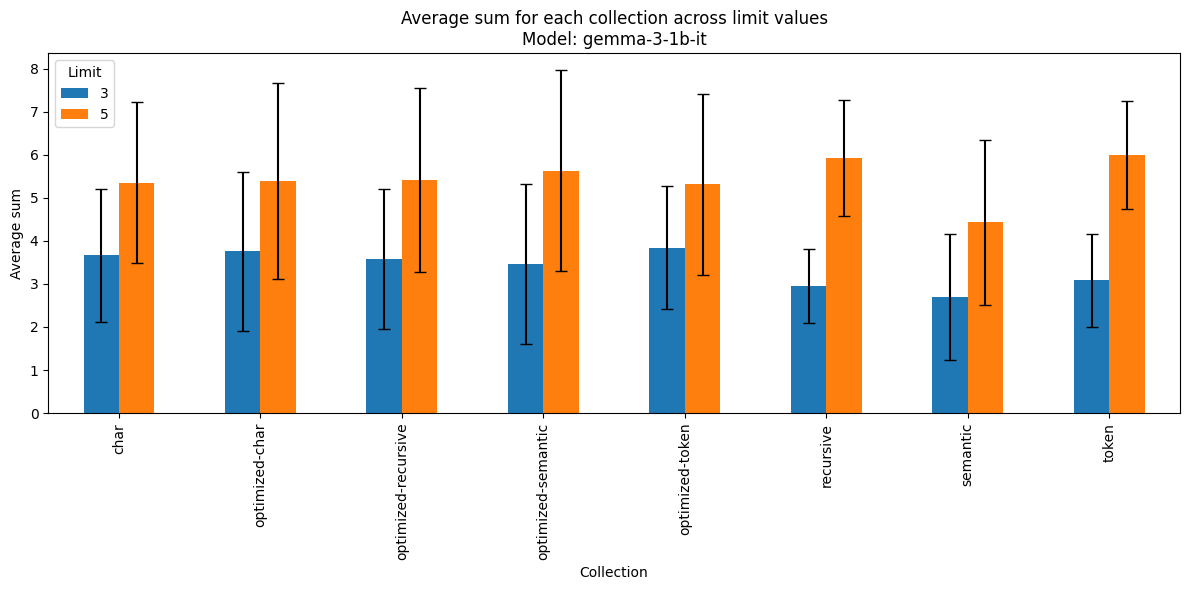

In [73]:
for model in df['model'].unique():
    # Filter data for the current model
    model_df = df[df['model'] == model]
    
    # Pivot the data: rows=collection, columns=limit, values=mean of sum
    pivot = model_df.pivot_table(index='collection', columns='limit', values='sum', aggfunc='mean')
    std_pivot = model_df.pivot_table(index='collection', columns='limit', values='sum', aggfunc='std')
    
    # Plot
    ax = pivot.plot.bar(
        yerr=std_pivot, 
        capsize=4, 
        figsize=(12, 6), 
        legend=True
    )
    ax.set_title(f'Average sum for each collection across limit values\nModel: {model}')
    ax.set_xlabel('Collection')
    ax.set_ylabel('Average sum')
    ax.legend(title='Limit')
    plt.tight_layout()
    plt.show()